In [4]:
import pandas as pd #Pour la lecture et la manipulation des donnés sous différents formats

import os #Pour manipuler les chemins des fichiers

import seaborn as sns #Pour la visualisation des données

import matplotlib.pyplot as plt #Pour les représenations graphiques 

import numpy as np #Pour les manipulations avec les matrices

from tqdm import tqdm #Pour mettre une barre de progression dans un for un peu long

import time #Pour lancer des timers

from PIL import Image # Pour ouvrir une photo jpeg


# Traitement d'image

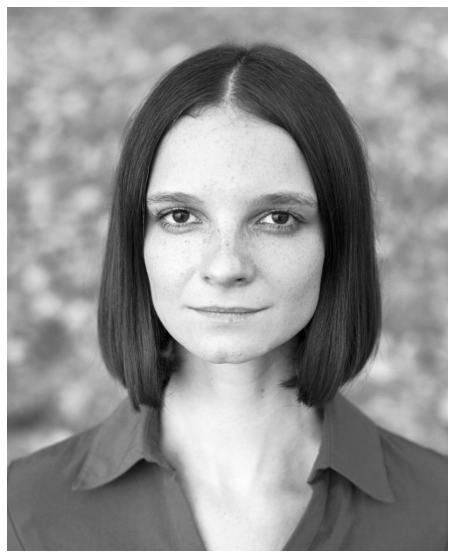

In [40]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 

# Charger l'image
image = Image.open("b1.jpg")

# Convertir l'image en un array NumPy
image_np = np.array(image)
# Convertir l'image en gris
gray_image = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)


plt.figure(figsize=(10,10))
plt.imshow(gray_image,cmap='Greys_r')
plt.axis('off')
plt.show()

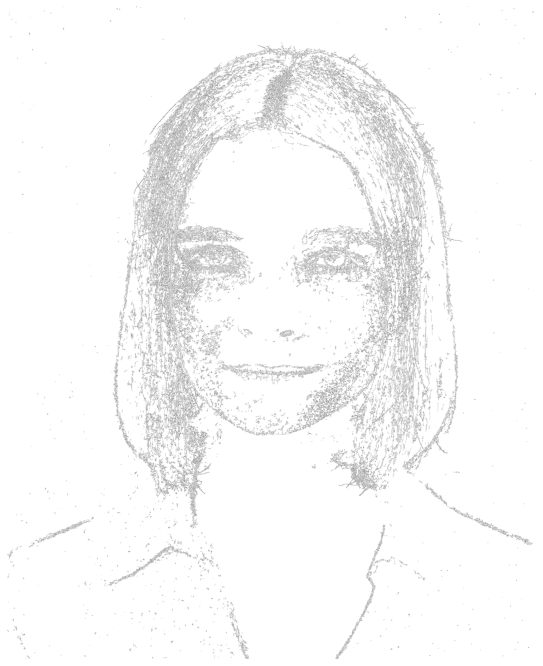

In [43]:
# Appliquer le filtre de Canny pour la détection de contours
canny_edges = cv2.Canny(gray_image, threshold1=20, threshold2=60)

plt.figure(figsize=(12,12))
plt.imshow(canny_edges,cmap='Greys')
plt.axis('off')
plt.show()

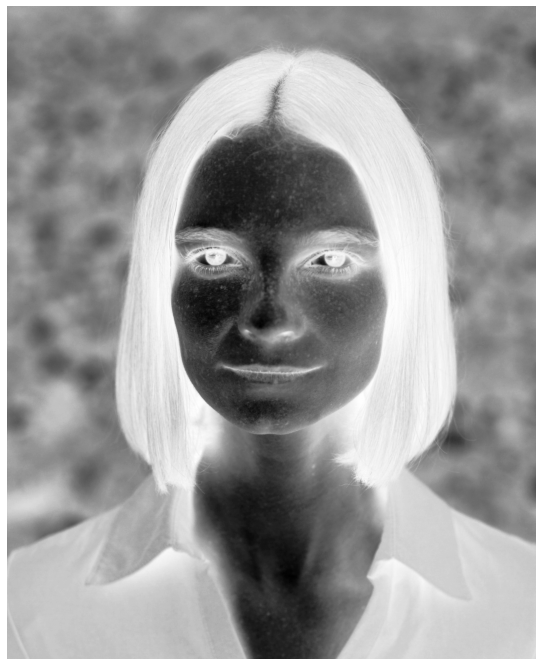

In [48]:
#Flou Gaussien: Réduit le bruit et les détails en utilisant une fenêtre gaussienne.

blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

plt.figure(figsize=(12,12))
plt.imshow(blurred_image,cmap='Greys')
plt.axis('off')
plt.show()

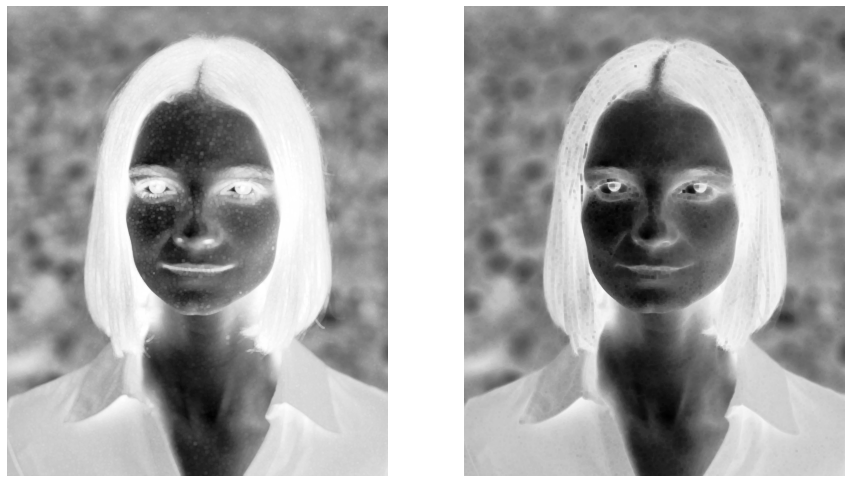

In [64]:
#Érosion et Dilatation pour accentuer certaines caractéristiques du visages.

kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(gray_image, kernel, iterations = 4)
dilation = cv2.dilate(gray_image, kernel, iterations = 5)


plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(erosion,cmap='Greys')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(dilation,cmap='Greys')
plt.axis('off')


plt.show()

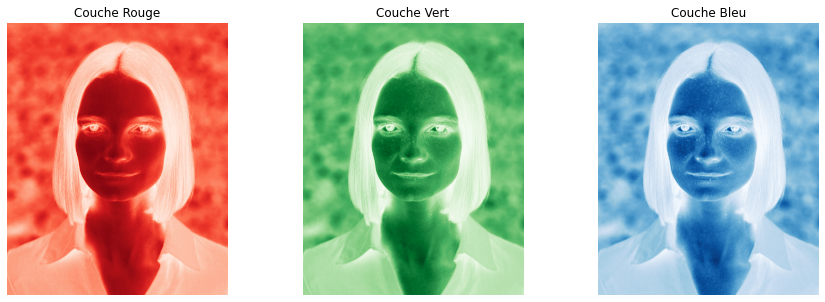

In [50]:

# Charger l'image
image = Image.open("b1.jpg")
# Convertir l'image en un array NumPy
image_np = np.array(image)

# Séparer les canaux Rouge, Vert et Bleu
red_channel = image_np[:,:,0]
green_channel = image_np[:,:,1]
blue_channel = image_np[:,:,2]

# Configurer la disposition des subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Afficher la couche Rouge
axs[0].imshow(red_channel, cmap='Reds')
axs[0].axis('off')  # Enlever les repères
axs[0].set_title('Couche Rouge')

# Afficher la couche Vert
axs[1].imshow(green_channel, cmap='Greens')
axs[1].axis('off')  # Enlever les repères
axs[1].set_title('Couche Vert')

# Afficher la couche Bleu
axs[2].imshow(blue_channel, cmap='Blues')
axs[2].axis('off')  # Enlever les repères
axs[2].set_title('Couche Bleu')

plt.show()

# Modèle KNN 

In [34]:
path = '/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/TP2/spam7.csv'
df = pd.read_csv(path, sep=';')

#Attribution 0,1
df['yesno'] = df['yesno'].map({'y':1,'n':0})

X = df.drop(columns='yesno',axis=1)
Y = df['yesno']


crl.tot    606.347851
dollar       0.245882
bang         0.815672
money        0.442636
n000         0.350286
make         0.305358
yesno        0.488698
dtype: float64

In [31]:
import umap

reducer = umap.UMAP(n_neighbors=25, min_dist=0.1, n_components=2)
embedding = reducer.fit_transform(X)

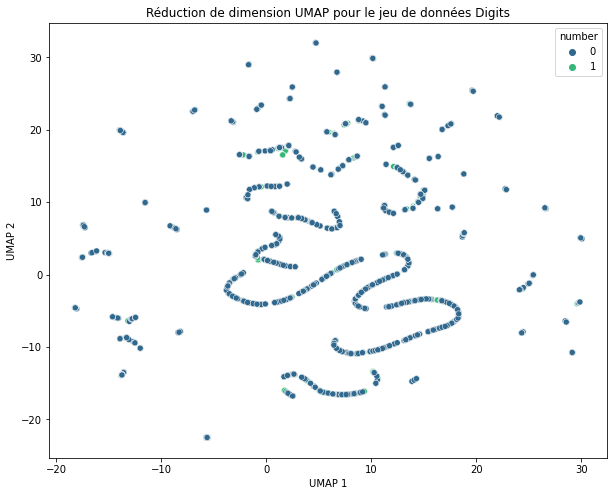

In [33]:
# Création d'un DataFrame pour la visualisation
df = pd.DataFrame({'UMAP 1': embedding[:, 0], 'UMAP 2': embedding[:, 1], 'number': Y})

# Visualisation des données réduites avec UMAP
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP 1', y='UMAP 2', hue='number', data=df, palette='viridis')
plt.title('Réduction de dimension UMAP pour le jeu de données Digits')
plt.show()


In [ ]:
# Sklearn utilities
from sklearn.model_selection import train_test_split

# Import some helpyful metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Import the required libraries
from sklearn.ensemble import RandomForestRegressor

# Lets setup our features and targets
X, y = df.drop(['Price'], axis=1), df.Price

# Setup our training and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a model of machine learning
forest_model = RandomForestRegressor()

# Fit our data to our model
forest_model.fit(X_train, y_train)